In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [19]:
df=pd.read_csv("D:\downloads\music recomendation\spotify_millsongdata.csv")

In [20]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [21]:
df.shape

(57650, 4)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [23]:
top_artist = df['artist'].value_counts().head(10)
print(top_artist)

artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Alabama             187
Reba Mcentire       187
Cher                187
Loretta Lynn        187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [24]:
df=df.drop('link',axis=1).reset_index(drop=True)

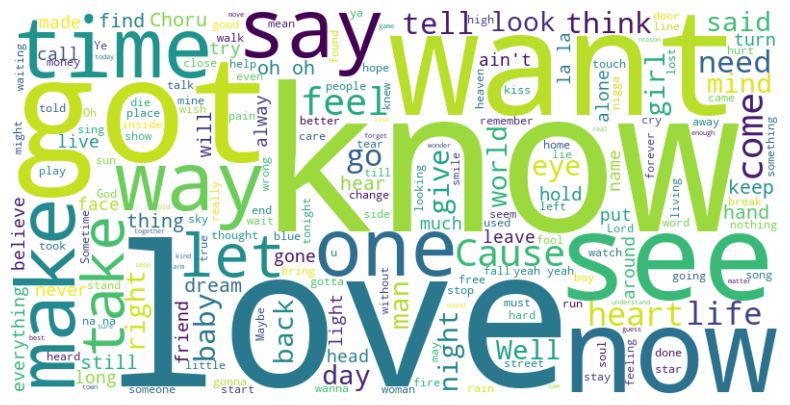

In [25]:
all_lyrics=" ".join(df['text'].dropna())
#wordcloud to visualize the most common words in lyrics
wordcloud = WordCloud(width=800,height=400,background_color='white').generate(all_lyrics)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
#Punkt is a module in (NLTK) that provides an unsupervised trainable model for sentence tokenization
nltk.download('punkt')
nltk.download('punkt_tab')
#Downloads the stopwords corpus (a list of common words like “the”, “and”, “is”).
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
stop_words = set(stopwords.words('english'))

In [28]:
def preprocess_text(text):
    #remove special char and numbers
    text=re.sub(r"[^a-zA-Z\s]","",text)
    #convert to lowercase
    text= text.lower()
    #tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [29]:
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [30]:
df

,artist,song,text,cleaned_text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA...",look face wonderful face means something speci...
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen...",take easy please touch gently like summer even...
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...,ill never know go put lousy rotten show boy to...
3,ABBA,Bang,Making somebody happy is a question of give an...,making somebody happy question give take learn...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,making somebody happy question give take learn...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,Irie days come on play \r\nLet the angels fly...,irie days come play let angels fly let devils ...
57646,Ziggy Marley,Hand To Mouth,Power to the workers \r\nMore power \r\nPowe...,power workers power power workers need power p...
57647,Zwan,Come With Me,all you need \r\nis something i'll believe \...,need something ill believe flashlights hall ca...
57648,Zwan,Desire,northern star \r\nam i frightened \r\nwhere ...,northern star frightened go rest cant sleep im...


In [31]:
# vecroeization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_song(song_name, df=df, tfidf_matrix=tfidf_matrix, top_n=5):
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in dataset"
    idx = idx[0]

    # Compute similarity only for the chosen song
    sim_scores = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()

    # Get top N indices
    sim_indices = sim_scores.argsort()[-top_n-1:-1][::-1]

    return df[['artist','song']].iloc[sim_indices]


In [56]:
df["song"][2]

'As Good As New'

In [51]:
df

,artist,song,text,cleaned_text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA...",look face wonderful face means something speci...
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen...",take easy please touch gently like summer even...
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...,ill never know go put lousy rotten show boy to...
3,ABBA,Bang,Making somebody happy is a question of give an...,making somebody happy question give take learn...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,making somebody happy question give take learn...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,Irie days come on play \r\nLet the angels fly...,irie days come play let angels fly let devils ...
57646,Ziggy Marley,Hand To Mouth,Power to the workers \r\nMore power \r\nPowe...,power workers power power workers need power p...
57647,Zwan,Come With Me,all you need \r\nis something i'll believe \...,need something ill believe flashlights hall ca...
57648,Zwan,Desire,northern star \r\nam i frightened \r\nwhere ...,northern star frightened go rest cant sleep im...


In [57]:
print("\nRecommendations for the song 'Hand To Mouth':")
recommendation = recommend_song("Hand To Mouth")
print(recommendation)


Recommendations for the song 'Hand To Mouth':
                   artist                       song
5234     Enrique Iglesias              Mouth 2 Mouth
30840       Eddie Cochran           Watch Your Mouth
32404       Faith No More             Mouth To Mouth
42754  Marianne Faithfull                 Desperanto
12042        Loretta Lynn  Put Your Hand In The Hand
